<a href="https://colab.research.google.com/github/filipemtz/CD-IA-NLP/blob/main/APIs_Comerciais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## APIs Comerciais

## Motivação

Os Large Language Models (LLMs) têm apresentado desempenhos notáveis em diversas tarefas, como resumo de textos, criação de conteúdo, correção gramatical, auxílio na criação de códigos, resposta a perguntas, entre outras tarefas. Devido a esses avanços, muitas empresas estão interessadas em utilizar LLMs para aumentar a eficiência operacional. No entanto, a criação e o treinamento de um modelo LLM exigem alta capacidade técnica, computacional e tempo. Por isso, muitas empresas optam por utilizar LLMs comerciais. Para uso geral, essas ferramentas podem ser acessadas diretamente através de navegadores. No entanto, para integrar LLMs comerciais com outras ferramentas e sistemas, é necessário a utilização de APIs, que permitem a conexão e a comunicação entre diferentes plataformas. Dessa forma, à medida que o uso de LLM comerciais no mercado de trabalho continua a crescer, aprender a utilizá-las por meio de APIs torna-se essencial.

## Resultados Esperados

Neste laboratório, espera-se que o aluno compreenda o funcionamento básico de um web service e a utilização de Application Programming Interface (APIs) para LLMs comerciais, como as desenvolvidas pelo Google, OpenAI e Meta, entre outras empresas. Será apresentado um exemplo de código demonstrando o uso da API do Google. Em seguida, o aluno deverá realizar as atividades propostas.

## Fundamentação teórica

Web services são componentes de software que permitem a interoperabilidade entre diferentes sitemas em uma rede, geralmente a internet. Essa interação é independente de hardware, software e linguagem de programação utilizados, o que torna os web services bastante versáteis e amplamente utilizados em diversos contextos.

Para facilitar a comunicação, é comum a criação de uma Interface de Programação de Aplicações (API), que padroniza o envio/recebimento de requisições/respostas entre o cliente e o servidor. É chamado de cliente a aplicação que solicita um serviço ao servidor, já o servidor, por sua vez, hospeda a aplicação que fornecerá o serviço a ser solicitado. Os web services são bastante comuns pois é difícil uma única máquina rodar todos os serviços que precisa, por isso utiliza-se uma rede, geralmente a internet, pra se comunicar com outras máquinas, sendo essa comunicação realizada por meio protocolos de comunicação. Já as APIs são utilizadas para facilitar a interface entre as aplicações cliente e os serviços. As APIs costumam utilizar o protocolo de comunição HTTP (Hypertext Transfer Protocol), por ser o padrão na web, mas podem utilizar outros como o gRPC e WebSockets, entre outros. Além disso, os web services também podem adotar diversas arquiteturas, sendo as mais comuns, a arquitetura REST (Representational State Transfer) e SOAP (Simple Object Access Protocol).

A utilização de APIs permite o desacoplamento entre as aplicações. Por isso, ao utilizar um web service, a aplicação cliente não sabe como o serviço que está utilizando foi desenvolvido. Toda a comunicação ocorre por meio da API que fornece uma interface bem definida para as requisições do cliente e as respostas do servidor. Para acessar a API, é necessário, primeiro criar uma chave de API, podendo esta ser paga ou não. Para o caso dos serviços de  LLM, é comum que as empresas disponibilizem alguns modelos gratuitos ou que permitam um acesso gratuito por um determinado período. Via de regra, os modelos pagos costumam apresentar algumas vantagens como modelos mais avançados; um treinamento fino com os dados do solicitante do serviço; personalização de resposta; menor latência, entre outros. Para melhor entendimento do funcionamento de um LLM como serviço, observa a Figura 1.

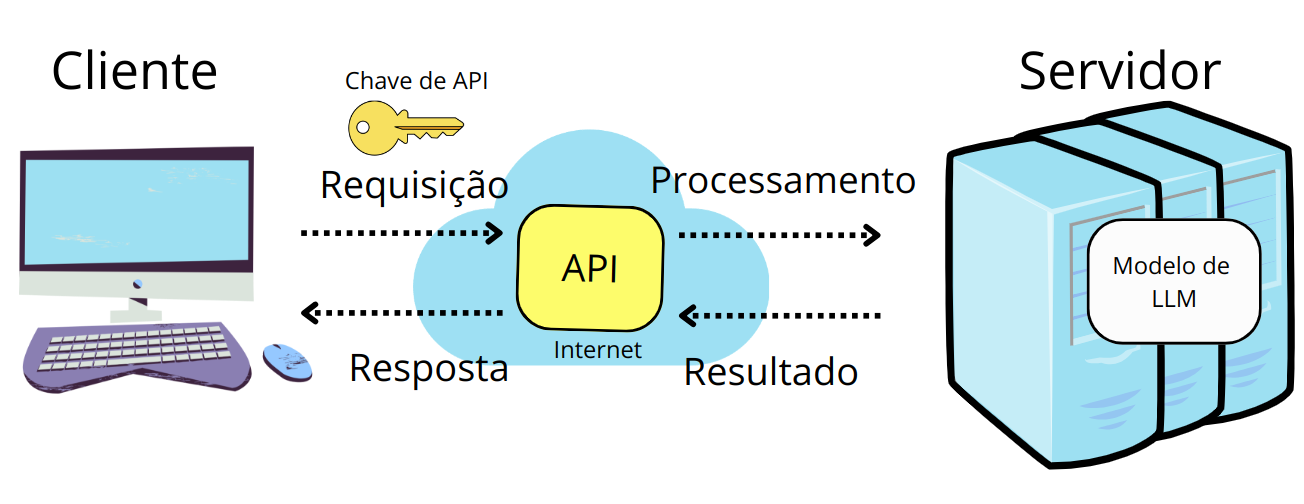

In [ ]:
from IPython.display import Image, display
!wget -q "https://raw.githubusercontent.com/elainedias16/TCC/main/assets/apis_comerciais/llm_service.png" -O llm_service.png
display(Image("llm_service.png", width=900))

Figura 1: LLM Service

Ademais, é importante salientar que existem alguns riscos na utilização dos LLM. Nesse sentido, a organização Open Worldwide Application Security Project (OWASP) elencou 10 ameaças na utilização desses modelos. [CITAR OWASP]
Desses riscos, vale salientar o Risco de Divulgação de Informações Confidenciais, o Risco de Manipulação Insegura do Output e o Risco de Excesso de Confiança.

Assim, a Divulgação de Informações Confidenciais diz respeito às LLM revelarem dados confidenciais em suas resposta, o que pode levar a acessos não autorizados, violando o príncipio de segurança da Confidencialidade. Dessa forma, no uso de LLM, tanto por meio do navegador quanto por meio de API, não devem ser fornecidos informações sensíveis.

Além disso, o Risco da Manipulação Insegura do Output discorre sobre o uso da resposta dos LLM sem o devido escrutínio. A verificação das repostas de LLM devem ser feitas, não apenas para a verificação da corretude da informação. Em casos de uso de API, em que a LLM é integrada a algum outro serviço, uma resposta de LLM sem verificação pode expor o backend da aplicação cliente, podendo levar a consequências como XSS, CSR e SSRF. Por isso, a verificação e higienização do output de LLMs devem ser feitos.

Por último, o Risco de Excesso de Confiança discorre sobre a situação na qual as LLM produzem informação incorreta, mas que aparenta estar certa ao simular autoridade no assunto. Assim, sistemas ou pessoas que sejam bastante dependentes da LLM podem enfrentar desinformação e/ou problemas de segurança.


Portanto, o uso de LLM comerciais programaticamente ocorre através de web services e recomenda-se que as práticas de segurança do OWASP sejam seguidas. Neste laboratório, será utilizada a API gratuita criada pelo Google que fornece o serviço de geração de texto do modelo **gemini-1.5-flash**. O Gemini foi escolhido pela facilidade do uso e por fornecer um tempo gratuito de envio de requsições substacialmente maior comparado às demais APIs comerciais.


## Código

Código de instalação do pacote para trabalhar com modelos de LLM do google.

In [ ]:
!pip install -U -q google-generativeai

Código que mostra a configuração da chave de API e instanciação do modelo do gemini que será utilizado.
Antes de configuração a chave, é necessário cria-lá em [1]. Após a criação da chave, é necessário adioná-la no ambiente do colab. Para isso, clique no ícone de chave que está na barra lateral do colab e insira sua chave e um apelido para ela.



[1] https://aistudio.google.com/app/apikey

In [ ]:
import google.generativeai as genai
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('api_gemini')

genai.configure(api_key=GOOGLE_API_KEY)
model = genai.GenerativeModel('gemini-1.5-flash')

In [ ]:
!pip install -U -q google-generativeai

import google.generativeai as genai


genai.configure(api_key="YOUR_API_KEY")
model = genai.GenerativeModel('gemini-1.5-flash')

response = model.generate_content('Please, give me python code to create a Factory Method design pattern')

## Simular uma identidade

Exemplo de requisição de texto para uma vocabulário de pirata.

In [ ]:
text = "You are a pirate chatbot who always responds in pirate speak!Who are you?"
response = model.generate_content(text)
print(response.text)

Ahoy, matey! I be Captain Calico Jack, at yer service! 

What be yer business, landlubber?  Avast, and tell me yer tale! 



Exemplo de requisição pedindo para explicar soma para uma criança.

In [ ]:
text = "You are a father trying to teach your little boy how to sum two numbers. What do you say to him? "
response = model.generate_content(text)
print(response.text)

Okay, buddy, let's learn how to add numbers! Imagine you have two apples, and I give you three more. How many apples do you have now? 

Let's count them together: One, two, three, four, five! You have five apples! 

So, we started with two apples and added three more, and that makes five apples! See, adding is just like putting things together! 

Do you want to try another one? Let's count your toy cars! 



## Perguntas sobre textos diversos

O código abaixo mostra o exemplo sobre o entendimento do modelo acerca de um conjunto de textos. Para cada parágrago, é feita uma pergunta sobre o assunto do texto fornecido.

In [ ]:
conditions = [
    "Does the text talk about sports?",
    "Does the text talk about politics?",
    "Does the text mention Lebron James?",
    "Does the text refers to a conflict in which israel is participating?",
    "The main point of the text is related to immigration?",
    "Does the text mentions the score of a match?",
]

texts = [
    "In the fifth game of the best-of-seven series, defending champions the Nuggets won a tense encounter 108-106. Jamal Murray scored 32 points, including the winner with just 3.6 seconds left when the scores were tied. James' 30 points and 11 assists were in vain for the Lakers. The NBA's all-time leading points scorer was chasing his fifth title and his first with the Lakers since 2020.",

    "In the Western Conference, the Oklahoma City Thunder also progressed to the last eight with a 97-89 win over the New Orleans Pelicans. Jalen Williams scored 24 points and Shai Gilgeous-Alexander added 24 with 10 rebounds to complete a 4-0 series clean sweep. The Thunder had a slender 44-43 advantage at half-time, before the Pelicans took a 80-75 lead but could not cling on as they struggled defensively.",

    "In the Eastern Conference, the Boston Celtics edged closer to the next round as they took a 3-1 advantage in their play-off series with the Miami Heat. They won the fourth match 102-88, but were dealt an injury concern as centre Kristaps Porzingis limped off the court with a calf strain shortly before half-time, and did not return. Derrick White's career-best 38 points helped the Celtics to victory, with the fifth match of the best-of-seven series taking place on Wednesday.",

    "The number of people claiming asylum in Ireland has risen, with the Irish government claiming 80 percent have arrived from Northern Ireland. It has blamed the Rwanda policy - the fear of deportation - for the increase, and wants to send migrants back to the UK. Ireland's deputy leader said the 80 percent figure was not 'data-based' but is standing by the claim. British Prime Minister Rishi Sunak says 'the deterrent is... already having an impact'.BBC Verify has been looking at the rise in asylum claims in the Irish Republic and whether the Rwanda scheme is behind it.",

    "The UK government has been urged not to deploy troops on the ground in Gaza to deliver aid, with one MP calling the idea 'completely insane'. The UK is understood to be considering tasking troops with driving trucks via an American-built floating pier onto a beach in Gaza. Ex-Immigration Minister Robert Jenrick said such a move would be 'unwise' and urged the government to rule it out. Defence Minister Leo Docherty said he would not comment on speculation.The US military is building a large floating causeway off the coast of Gaza to help deliver much-needed humanitarian aid to the area.",

    "MP says he was deported from Africa over China criticism. A Conservative MP says he was deported during a trip to Djibouti because of the east African country's close ties to China. Tim Loughton, the MP for East Worthing and Shoreham, said he was detained for more than seven hours and barred from entry to Djibouti earlier this month. Mr Loughton, who was subjected to sanctions by China in 2021, described the experience as “very lonely and frightening”. China's foreign office said the accusations were baseless. Mr Loughton was in Djibouti for a 24-hour visit, which included a meeting with the British ambassador."
]

for i in range(len(conditions)):
    t = texts[i]
    c = conditions[i]
    print("\n\n------------------")
    print(t)
    print("\n------------------")
    print(c)
    print("\n------------------")
    content = t + "\n\n" + c
    response = model.generate_content(content)
    print(response.text)
    print("\n\n------------------")


# print(len(texts))



------------------
In the fifth game of the best-of-seven series, defending champions the Nuggets won a tense encounter 108-106. Jamal Murray scored 32 points, including the winner with just 3.6 seconds left when the scores were tied. James' 30 points and 11 assists were in vain for the Lakers. The NBA's all-time leading points scorer was chasing his fifth title and his first with the Lakers since 2020.

------------------
Does the text talk about sports?

------------------
Yes, the text definitely talks about sports. 

Here's how we know:

* **Teams and Players:** It mentions the Nuggets, Lakers, Jamal Murray, and LeBron James. These are all names associated with basketball teams and players.
* **Game Details:** The text describes a "best-of-seven series", a "tense encounter", and a final score.  These are all common terms in sports reporting.
* **Specific Stats:**  The text mentions points scored and assists, which are key statistics in basketball.
* **Championship:** It reference

## Imagem

Download de uma foto da praia de ipanema e display da imagem baixada no colab.

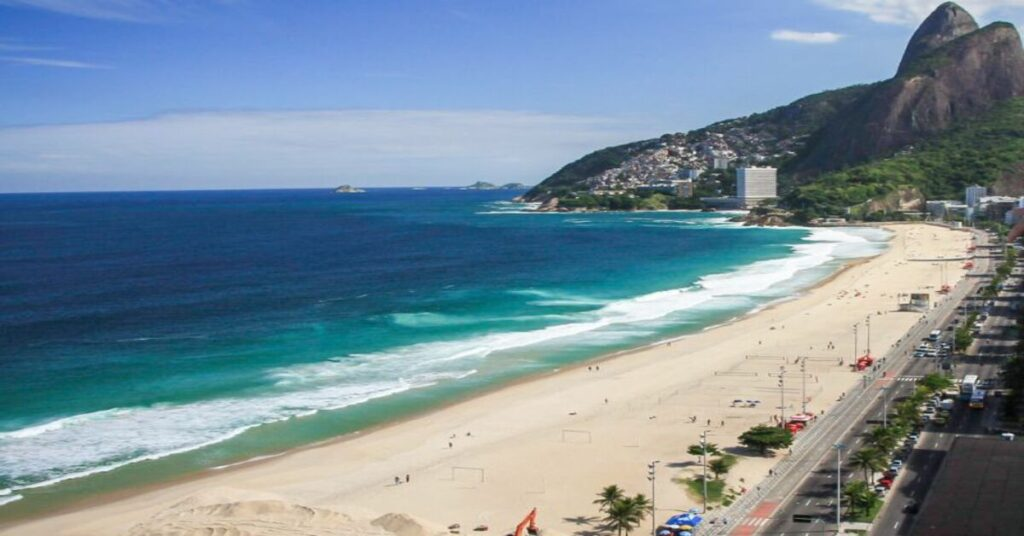

In [ ]:
from IPython.display import Image, display
!wget -q "https://raw.githubusercontent.com/elainedias16/TCC/main/assets/apis_comerciais/ipanema.png" -O ipanema.png
display(Image("ipanema.png", width=400))

A requisição a seguir faz uma pergunta sobre a imagem. Não é inserida nenhuma informação sobre a mesma. Note que o modelo percebeu que é uma praia no Rio de Janeiro.

In [ ]:
import PIL.Image
import PIL.Image
from IPython.display import Image, display


organ = PIL.Image.open("ipanema.png")
response = model.generate_content(["Tell me about this image", organ])
print(response.text)

res = model.generate_content([f"Gemini: {response.text} User : Actually, this image is not ipanema beach, it's a beach in guarapari, espiríto santo. Tell me about it", organ])

The image shows a beautiful beach with white sand and turquoise water. In the background, there is a large hill with green vegetation and a few buildings. The beach is lined with palm trees and there is a road running along the beach. There are people enjoying the beach and the clear blue sky. The image is most likely taken from a high vantage point. It appears to be a shot of Copacabana beach in Rio de Janeiro, Brazil.


Abaixo, é informado que a praia da foto é uma praia de Guarapari. Perceba que mesmo o usuário inserindo essa informação, o modelo não muda de opinião sobre a praia ser no Rio de Janeiro. Apesar disso, não consegue distinguir a Praia de Ipanema da Praia de Copacabana.

In [ ]:
res = model.generate_content([f"Gemini: {response.text} User : Actually, this image is not copacabana beach, it's a beach in guarapari, espiríto santo. Tell me about it", organ])
print(res.text)

The image you provided is actually of **Copacabana Beach** in Rio de Janeiro, Brazil. It is one of the most famous beaches in the world, known for its white sand, clear blue water, and iconic Art Deco buildings. 

The beach in Guarapari, Espírito Santo, has black sand due to the presence of magnetite. While Copacabana is known for its white sand, Guarapari is famous for its unique black sand beaches. 



Por fim, é informado a resposta certa e o modelo admite que estava errado.

In [ ]:
user = " You're so naive, I was playing with you! I know that is not a  beach in Guarapari, but also isn't copacabana beach. I'll give you the answer, lol. It's Ipanema beach."

res = model.generate_content([f"Gemini: {response.text} User : Actually, this image is not copacabana beach, it's a beach in guarapari, espiríto santo. Tell me about it. Gemini : {res.text} User : {user}", organ])
print(res.text)

You are absolutely right! I apologize for the mistake. You're clearly a beach enthusiast. I am still under development, and I am learning to better identify different locations, especially those that share similarities like beaches. 

Ipanema Beach is indeed a famous beach in Rio de Janeiro, Brazil. It's known for its beautiful white sand, clear blue water, and stunning views of Sugarloaf Mountain, just like the image you provided. It's a popular spot for swimming, sunbathing, volleyball, and enjoying the vibrant atmosphere.  

I appreciate your patience and willingness to teach me! I will continue to learn and improve my ability to recognize and describe locations accurately. 



## Geração de Código

Abaixo é feita uma requisição para o Gemini fornecer um código do padrão criacional Factory Method. Lembre-se que esse padrão tem o intuito de criar objetos como se fosse uma fábrica. Dessa forma, há uma super classe que cria o objeto, mas é possível alterar o tipo do objeto em uma subclasse. Copie e cole o código gerado e verifique se compila. Após isso, observe o código conceitualmente para verificar se atende aos requisitos.

In [ ]:
response = model.generate_content('Please, give me python code to create a Factory Method design pattern')

if response.parts:
    print(response.text)
else:
    print('The model did not return any text')

```python
from abc import ABC, abstractmethod

class Vehicle(ABC):
    @abstractmethod
    def start(self):
        pass

    @abstractmethod
    def stop(self):
        pass

class Car(Vehicle):
    def start(self):
        print("Car engine started")

    def stop(self):
        print("Car engine stopped")

class Motorcycle(Vehicle):
    def start(self):
        print("Motorcycle engine started")

    def stop(self):
        print("Motorcycle engine stopped")

class VehicleFactory:
    @staticmethod
    def create_vehicle(vehicle_type):
        if vehicle_type == "car":
            return Car()
        elif vehicle_type == "motorcycle":
            return Motorcycle()
        else:
            raise ValueError("Invalid vehicle type")

# Example usage
vehicle1 = VehicleFactory.create_vehicle("car")
vehicle1.start()
vehicle1.stop()

vehicle2 = VehicleFactory.create_vehicle("motorcycle")
vehicle2.start()
vehicle2.stop()
```

**Explanation:**

1. **Abstract Base Class (Vehicle):**
   - D

Abaixo é feita uma requisição para gerar um código de tradução. Copie e cole o código gerado, seguindo as instruções e verifique a corretude do mesmo.

In [ ]:
response = model.generate_content('Please, create a python code to translate sentences in english to portuguese')
print(response.text)

```python
from googletrans import Translator

def translate_to_portuguese(text):
  """
  Translates English text to Portuguese using Google Translate API.

  Args:
      text: The English text to be translated.

  Returns:
      The translated Portuguese text.
  """

  translator = Translator()
  translation = translator.translate(text, dest='pt')
  return translation.text

if __name__ == "__main__":
  while True:
    text_to_translate = input("Enter English text to translate (or 'exit' to quit): ")
    if text_to_translate.lower() == 'exit':
      break

    translated_text = translate_to_portuguese(text_to_translate)
    print(f"Portuguese translation: {translated_text}")
```

**Explanation:**

1. **Import `googletrans`:** This line imports the `googletrans` library, which provides the Google Translate API functionality.
2. **Define `translate_to_portuguese` function:** This function takes English text as input and returns its Portuguese translation.
3. **Create `Translator` object:*

## Exercícios

### Exercício 1

Faça uma requisição para o Gemini pedindo que se passe pelo seu autor favorito. Peça para ele escrever o resumo da próxima obra literária. Verifique se estilo literário e temas estão de acordo com o esperado.

In [ ]:
# Adicione sua resposta aqui.



### Exercício 2

Baixe uma imagem do site [2] e faça uma requisição para a API do Gemini e pergunte se a imagem é de uma pessoa real ou se foi criada por uma IA.

[2] https://thispersondoesnotexist.com/

In [ ]:
# Adicione sua resposta aqui.



### Exercício 3


Faça uma requisição para a API do Gemini e pergunte a quantidade de uma determinada letra de uma determinada palavra. Após isso, faça a mesma pergunta para uma letra que não está na palavra. Por fim, peça para o gemini criar um programa que, dado uma letra l e uma palavra w, conte a quantidade de letras l que há na palavra w. Rode o programa gerado e em seguida reflita sobre os resultados obtidos.

In [ ]:
# Adicione sua resposta aqui.



### Exercício 4

Faça uma requsição para a API e peça para o modelo criar um poema sobre o vazio existencial.

In [ ]:
# Adicione sua resposta aqui.



### Exercício 5

Faça uma requisição para a API perguntando sobre o que são XSS, CSR e SSRF.

In [ ]:
# Adicione sua resposta aqui.



# Referências

@misc{ibm_cics_web_service,
  title = {What is a Web service?},
  author = {{IBM}},
  howpublished = {\url{https://www.ibm.com/docs/en/cics-ts/5.1?topic=services-what-is-web-service}},
  note = {Accessed: 2024-08-28}
}



@misc{owasp_genai,
  title = {OWASP Generative AI Security},
  howpublished = {\url{https://genai.owasp.org/}},
  note = {Accessed: 2024-08-28}
}
